## Find Punt

Originally this notebook was going to be used to find the best stat to punt, this is no longer the case. In the first couple of rounds, it is often better to choose the best player available rather than start off by choosing a player based on a punting strategy (given how top-heavy the NBA is). Thus a variety of traditional single and double punts will be used instead:

Punting Website: https://hashtagbasketball.com/introduction-punting-fantasy-basketball

Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import utils
%matplotlib inline
from constants import DATA_DIR #TEAMS, SECONDS_SLEEP

Read in 2017-2021 player data (per game stats)

In [9]:
df = utils.csv_concatenate(os.path.join(DATA_DIR, 'PlayerStats'))
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6329 entries, 0 to 6328
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  6329 non-null   object 
 1   POS     6329 non-null   object 
 2   AGE     6329 non-null   int64  
 3   TEAM    6329 non-null   object 
 4   G       6329 non-null   int64  
 5   GS      6329 non-null   int64  
 6   MP      6329 non-null   float64
 7   FG      6329 non-null   float64
 8   FGA     6329 non-null   float64
 9   FG%     6329 non-null   float64
 10  3P      6329 non-null   float64
 11  3PA     6329 non-null   float64
 12  3P%     6329 non-null   float64
 13  2P      6329 non-null   float64
 14  2PA     6329 non-null   float64
 15  2P%     6329 non-null   float64
 16  eFG%    6329 non-null   float64
 17  FT      6329 non-null   float64
 18  FTA     6329 non-null   float64
 19  FT%     6329 non-null   float64
 20  ORB     6329 non-null   float64
 21  DRB     6329 non-null   float64
 22  

Since we're looking at which stats are most tightly correlated, let's filter out those stats specifically

In [10]:
corr_columns = ['FG%','FT%','3P','PTS','TRB','AST','STL','BLK','TOV']
corr_df = df[corr_columns]
corr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6329 entries, 0 to 6328
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FG%     6329 non-null   float64
 1   FT%     6329 non-null   float64
 2   3P      6329 non-null   float64
 3   PTS     6329 non-null   float64
 4   TRB     6329 non-null   float64
 5   AST     6329 non-null   float64
 6   STL     6329 non-null   float64
 7   BLK     6329 non-null   float64
 8   TOV     6329 non-null   float64
dtypes: float64(9)
memory usage: 445.1 KB


Fill in missing values

In [11]:
corr_df = corr_df.fillna(0)

Plot histograms for each stat

<AxesSubplot:ylabel='Frequency'>

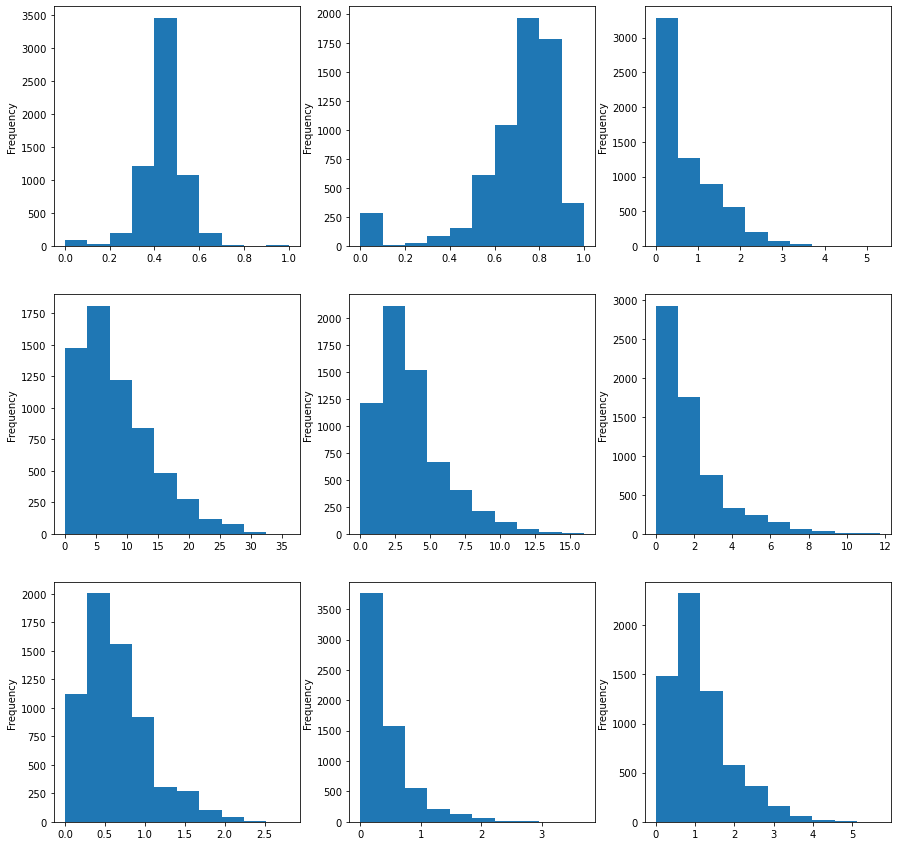

In [12]:
fig, axs = plt.subplots(3,3,figsize=(15,15))
corr_df['FG%'].plot(kind='hist', ax=axs[0,0])
corr_df['FT%'].plot(kind='hist', ax=axs[0,1])
corr_df['3P'].plot(kind='hist', ax=axs[0,2])
corr_df['PTS'].plot(kind='hist', ax=axs[1,0])
corr_df['TRB'].plot(kind='hist', ax=axs[1,1])
corr_df['AST'].plot(kind='hist', ax=axs[1,2])
corr_df['STL'].plot(kind='hist', ax=axs[2,0])
corr_df['BLK'].plot(kind='hist', ax=axs[2,1])
corr_df['TOV'].plot(kind='hist', ax=axs[2,2])

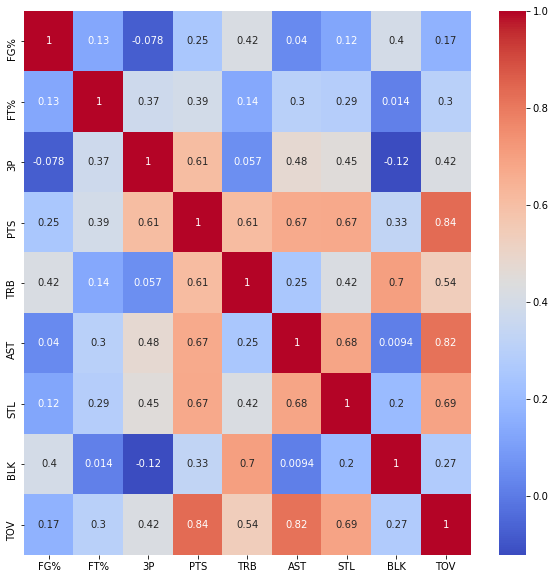

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
sns_plot = sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt='.2g', ax=ax)
fig = sns_plot.get_figure()

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [15]:
calc_vif(corr_df)

,variables,VIF
0,FG%,12.769873
1,FT%,12.617639
2,3P,4.488213
3,PTS,18.998287
4,TRB,10.749775
5,AST,8.547296
6,STL,7.473053
7,BLK,4.126395
8,TOV,19.580137


Based on this data, punting blocks seems like the best option... the histogram shows that the vast majority of players average less than 0.5 blocks per game - this means there are few elite shot blockers and they're likely to get draftd early on. Furthermore, blocks are least co-linear with most other categories and therefore can be punted with little consequence. Total rebounds does take a hit, however, there are quite a few bigs that are weak shot-blockers.

In [16]:
corr_df.drop(columns=['BLK'], inplace=True)

In [17]:
calc_vif(corr_df)

,variables,VIF
0,FG%,12.551614
1,FT%,12.522499
2,3P,4.417765
3,PTS,18.956671
4,TRB,8.013741
5,AST,8.345113
6,STL,7.464368
7,TOV,19.550893
